# 🧾 7.6 — Laboratorio: Análisis de Ventas con Pandas y Numpy

En este laboratorio aplicarás todo lo aprendido en el módulo para analizar datos reales de ventas.

Trabajaremos con el dataset `ventas.csv`, que contiene los siguientes campos:
- **fecha**: día de la venta
- **producto**: identificador del producto
- **cantidad**: unidades vendidas
- **precio**: precio unitario del producto

💡 *Objetivo:* generar métricas de negocio y representaciones resumidas a partir de los datos.

In [14]:
import pandas as pd
import numpy as np
from IPython.display import display

print('✅ Laboratorio 7.6 – Análisis de Ventas listo.')

✅ Laboratorio 7.6 – Análisis de Ventas listo.


---
## 1️⃣ Cargar y explorar el dataset

Vamos a cargar el archivo CSV `../datasets/ventas.csv` y observar su estructura básica.

In [15]:
df = pd.read_csv('../../datasets/ventas.csv')
df.head()

,fecha,producto,cantidad,precio
0,2025-10-01,A,10,5.2
1,2025-10-01,B,4,7.1
2,2025-10-02,A,6,5.0
3,2025-10-02,C,9,3.9
4,2025-10-03,B,7,7.2


📊 Verificamos el tipo de datos y comprobamos si hay valores nulos.

In [16]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fecha     6 non-null      object 
 1   producto  6 non-null      object 
 2   cantidad  6 non-null      int64  
 3   precio    6 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 324.0+ bytes


fecha       0
producto    0
cantidad    0
precio      0
dtype: int64

---
## 2️⃣ Normalizar nombres y añadir columna de coste estimado

Para simplificar los cálculos, renombraremos las columnas y añadiremos una columna de **coste_unitario** (por ejemplo, un 60% del precio).

In [17]:
# Renombrar columnas a nombres más homogéneos
df.rename(columns={
    'cantidad': 'unidades',
    'precio': 'precio_unitario'
}, inplace=True)

# Crear una columna de coste (suponemos margen 40%)
df['coste_unitario'] = df['precio_unitario'] * 0.6
df.head()

,fecha,producto,unidades,precio_unitario,coste_unitario
0,2025-10-01,A,10,5.2,3.12
1,2025-10-01,B,4,7.1,4.26
2,2025-10-02,A,6,5.0,3.00
3,2025-10-02,C,9,3.9,2.34
4,2025-10-03,B,7,7.2,4.32


---
## 3️⃣ 🧩 Ejercicio — Calcular métricas de negocio

Calcula las siguientes columnas nuevas:
- `ingresos = unidades × precio_unitario`
- `coste_total = unidades × coste_unitario`
- `beneficio = ingresos - coste_total`

👉 *Escribe tu código en la siguiente celda.*

In [18]:
# ✏️ Escribe tu código aquí...

### ✅ Solución propuesta

In [19]:
df['ingresos'] = df['unidades'] * df['precio_unitario']
df['coste_total'] = df['unidades'] * df['coste_unitario']
df['beneficio'] = df['ingresos'] - df['coste_total']
df.head()

,fecha,producto,unidades,precio_unitario,coste_unitario,ingresos,coste_total,beneficio
0,2025-10-01,A,10,5.2,3.12,52.0,31.20,20.80
1,2025-10-01,B,4,7.1,4.26,28.4,17.04,11.36
2,2025-10-02,A,6,5.0,3.00,30.0,18.00,12.00
3,2025-10-02,C,9,3.9,2.34,35.1,21.06,14.04
4,2025-10-03,B,7,7.2,4.32,50.4,30.24,20.16


---
## 4️⃣ Agrupar por producto y obtener resumen

Queremos conocer el total de **unidades vendidas**, **ingresos** y **beneficios** por producto.

In [20]:
# 🧩 Ejercicio — genera un resumen agrupado por producto

### ✅ Solución propuesta

In [21]:
resumen = df.groupby('producto', as_index=False).agg({
    'unidades': 'sum',
    'ingresos': 'sum',
    'beneficio': 'sum'
}).sort_values(by='beneficio', ascending=False)
resumen

,producto,unidades,ingresos,beneficio
0,A,16,82.0,32.80
1,B,11,78.8,31.52
2,C,11,43.3,17.32


---
## 5️⃣ Calcular métricas estadísticas globales

Usa Numpy y Pandas para obtener:
- Promedio de unidades vendidas
- Precio medio de venta
- Beneficio total y medio

In [22]:
media_unidades = np.mean(df['unidades'])
precio_medio = np.mean(df['precio_unitario'])
beneficio_total = np.sum(df['beneficio'])
beneficio_medio = np.mean(df['beneficio'])

print(f"📦 Promedio de unidades vendidas: {media_unidades:.2f}")
print(f"💰 Precio medio de venta: {precio_medio:.2f} €")
print(f"💵 Beneficio total: {beneficio_total:.2f} €")
print(f"⚖️ Beneficio medio: {beneficio_medio:.2f} €")

📦 Promedio de unidades vendidas: 6.33
💰 Precio medio de venta: 5.42 €
💵 Beneficio total: 81.64 €
⚖️ Beneficio medio: 13.61 €


---
## 6️⃣ Visualización rápida del beneficio por producto

Podemos usar el método `.plot()` integrado de Pandas para un gráfico simple.

<Axes: title={'center': 'Beneficio por producto'}, xlabel='producto'>

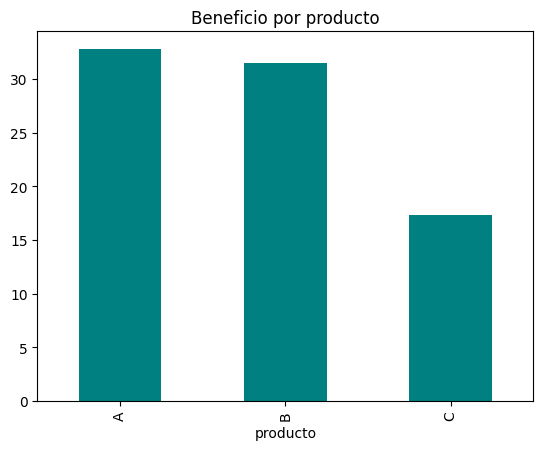

In [23]:
resumen.plot(x='producto', y='beneficio', kind='bar', legend=False, title='Beneficio por producto', color='teal')

---
## 7️⃣ 🧠 Conclusiones del laboratorio

- Has calculado ingresos, costes y beneficios a partir de un dataset real.
- Has aprendido a agrupar, resumir y visualizar datos.
- Este tipo de análisis se usa en dashboards de negocio y sistemas de reporting.

💡 Próximo paso → **Módulo 8 – Visualización Avanzada con Matplotlib, Seaborn y Plotly.**